<a href="https://colab.research.google.com/github/LKSfiuza/MachineLearning-AI-UFV/blob/main/Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

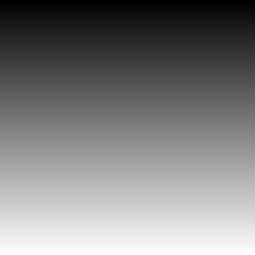

In [30]:
I = np.zeros((255,255),np.uint8)

for i in range(0, 255):
  I[i,:] = i


cv2_imshow(I)

# Limiarização global

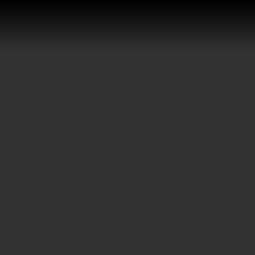

In [31]:
ret,I1 = cv2.threshold(I,50,255,cv2.THRESH_BINARY)
ret,I2 = cv2.threshold(I,127,255,cv2.THRESH_BINARY_INV)
ret,I3 = cv2.threshold(I,50,255,cv2.THRESH_TRUNC)
ret,I4 = cv2.threshold(I,127,255,cv2.THRESH_TOZERO)
ret,I5 = cv2.threshold(I,127,255,cv2.THRESH_TOZERO_INV)
cv2_imshow(I3)

/tmp/ipython-input-3982828901.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(I.ravel(),255,[0,255]); plt.show()


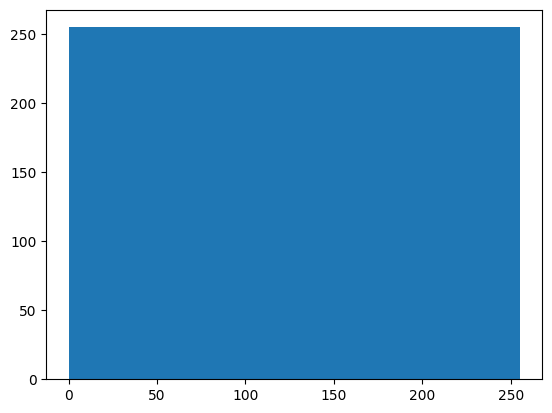

In [32]:
plt.hist(I.ravel(),255,[0,255]); plt.show()

Digite o valor do limiar: 200


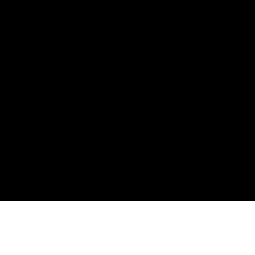

In [33]:
L = int(input("Digite o valor do limiar: "))

ret, I6 = cv2.threshold(I,L,255,cv2.THRESH_BINARY)
cv2_imshow(I6)


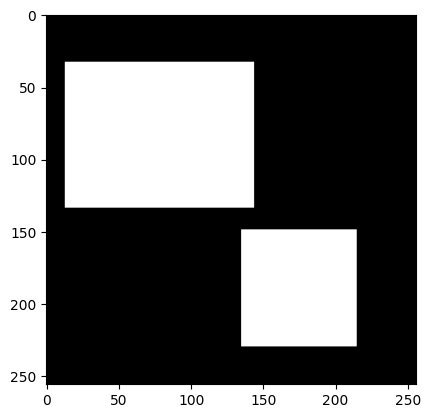

In [34]:
B = np.zeros((256, 256),dtype='uint8')+100

B[33:134, 13:144]=200
B[149:230, 135:215]=200
plt.imshow(B,cmap='gray')

In [ ]:
plt.hist(B.ravel(),255,[0,255]); plt.show()

L = int(input("Digite o valor do limiar: "))

ret, B2 = cv2.threshold(B,L,255,cv2.THRESH_BINARY)
cv2_imshow(B2)

titulos = ['Original', 'Limiar Iterativo']
imagens = [B, B2]

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(imagens[i], cv2.COLOR_BGR2RGB)
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#

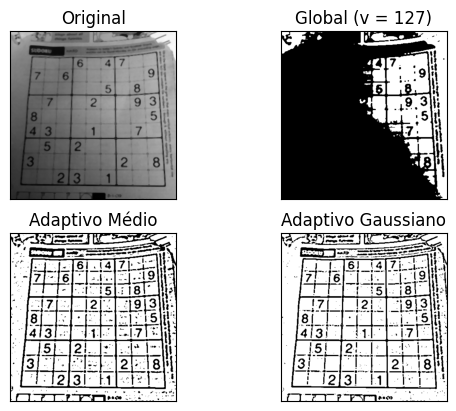

In [62]:
img = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titulos = ['Original', 'Global (v = 127)', 'Adaptivo Médio', 'Adaptivo Gaussiano']
imagens = [img, th1, th2, th3]


for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(imagens[i], cmap='gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# OTSU

Limiar Otsu =  100.0


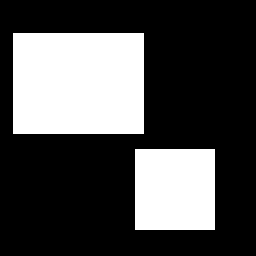

In [66]:
ret1, B3 = cv2.threshold(B,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Limiar Otsu = ', ret1)
cv2_imshow(B3)

In [68]:
from skimage.io import imread, imshow
from scipy import stats
from matplotlib import pyplot as plt

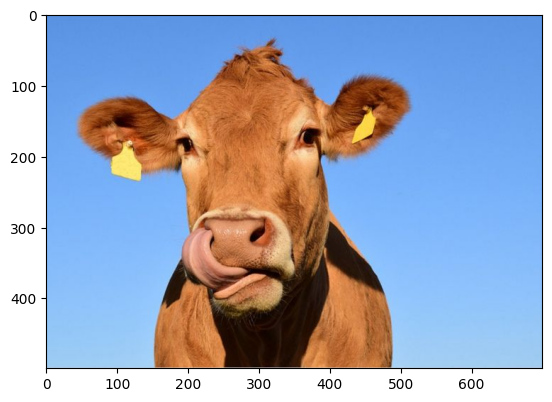

In [69]:
im = imread('cow.jpg')
plt.imshow(im)

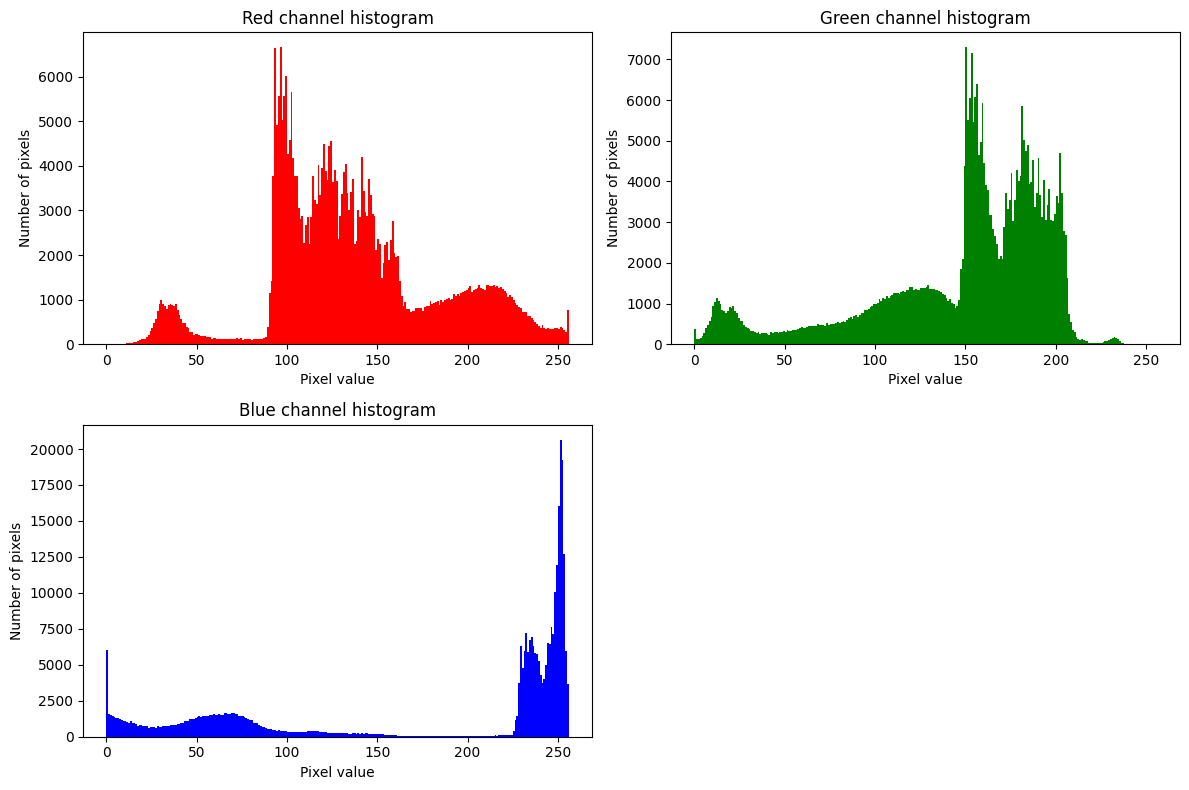

In [70]:

plt.figure(figsize=(12, 8))

# Histograma do canal vermelho
plt.subplot(2, 2, 1)
im_hist_red = plt.hist(im[:, :, 0].flatten(), bins=256, range=[0, 256], facecolor='red')
plt.title('Red channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

# Histograma do canal verde
plt.subplot(2, 2, 2)
im_hist_green = plt.hist(im[:, :, 1].flatten(), bins=256, range=[0, 256], facecolor='green')
plt.title('Green channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

# Histograma do canal azul
plt.subplot(2, 2, 3)
im_hist_blue = plt.hist(im[:, :, 2].flatten(), bins=256, range=[0, 256], facecolor='blue')
plt.title('Blue channel histogram')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')

plt.tight_layout()
plt.show()

In [71]:
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]

In [73]:
blue_lower=0
blue_upper=200

In [74]:
mask = (blue >= blue_lower) & (blue <= blue_upper)

rc = red.copy()
rc[np.invert(mask)] = 0

gc = green.copy()
gc[np.invert(mask)] = 0

bc = blue.copy()
bc[np.invert(mask)] = 0

segmentada = np.stack((rc, gc, bc), axis=1)

segmentada = np.stack((bc))

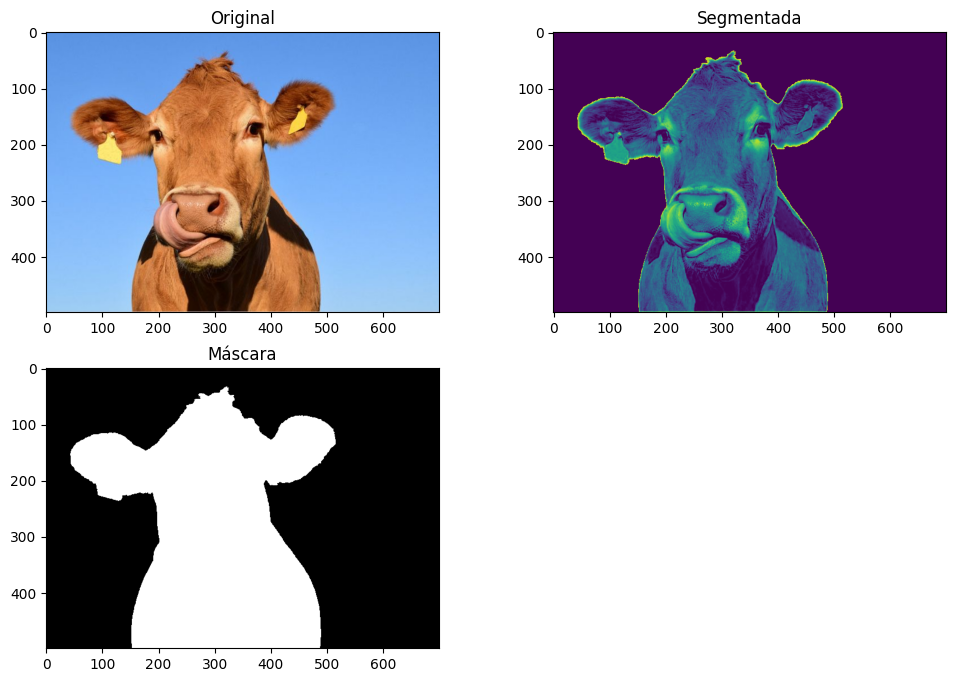

In [76]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(segmentada)
plt.title('Segmentada')
plt.subplot(2, 2, 3)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.show()